# Python II - Assignment 3
This **Home Assignment** is to be submitted and you will be given points for each of the tasks. The first task will recap a lot of the things you learned in this couse (web scraping, regex, pandas, nltk). The second task focuses primarly on graphs.

## Formalities
**Submit in a group of 2-3 people until 06.07.2020 23:59CET. The deadline is strict!**

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* We run python 3.8 on our machines, so you can use newer features
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Double check if your code relies on presence of files or directories other than those mentioned
    in given tasks. Tests run under Linux, hence don't use Windows style paths 
    (`some\path`, `C:\another\path`). Also, use paths only that are relative to and within your
    working directory (OK: `some/path`, `./some/path`; NOT OK: `/home/alice/python`, 
    `../../python`).
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for the mean only, only prints the output instead of returning it!)
- ...

In [ ]:
# credentials of all team members (you may add or remove items from the dictionary)
team_members = [
    {
        'first_name': 'Mariem',
        'last_name': 'MOUNIR',
        'student_id': 415862
    },
    {
        'first_name': 'Poorya',
        'last_name': 'Khanali Satarerazleghi',
        'student_id': 381198
    }
]

# Task 1: Sentiment of Tweets (6 points)

## b) Load dataset from the internet (2.0)
Consider the twitter data provided in https://github.com/zfz/twitter_corpus/blob/master/full-corpus.csv.

Write a function `load_dataset()` that gets the dataset from the internet and loads it into a dataframe with two columns `'gt_sentiment'` and `'original_tweet'` that stores the sentiment and (unprocessed) tweet content from that dataset. It returns that dataframe. Use the requests library to fetch the csv file from the internet. Thereby drop all tweets with "irrelevant" sentiment.

In [1]:
import requests
from io import StringIO
import pandas as pd
def load_dataset():
    # the url of the raw CSV 
    CSV_URL = "https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv"
    page=requests.get(CSV_URL).content
    df=pd.read_csv(StringIO(page.decode('utf-8')))

    df = df.rename(columns={'Sentiment': 'gt_sentiment', 'TweetText': 'original_tweet'})
    data = df[['gt_sentiment','original_tweet']]
    # remove irrelevant tweets
    data = data[data['gt_sentiment']!='irrelevant']
    return data
    

In [2]:
# import csv
# CSV_URL = "https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv"
# with requests.Session() as s:
#     download = s.get(CSV_URL)

#     decoded_content = download.content.decode('utf-8')

#     cr = csv.reader(decoded_content.splitlines(), delimiter=',')
#     my_list = list(cr)

# pd.DataFrame(my_list[1:],columns=my_list[0])

In [3]:
df = load_dataset()
df.head()
# example dataframe:
# 	gt_sentiment 	original_tweet
#0 	positive 	Now all @Apple has to do is get swype on the i...
#1 	positive 	@Apple will be adding more carrier support to ...
#2 	positive 	Hilarious @youtube video - guy does a duet wit...
#3 	positive 	@RIM you made it too easy for me to switch to ...
#4 	positive 	I just realized that the reason I got into twi...

,gt_sentiment,original_tweet
0,positive,Now all @Apple has to do is get swype on the i...
1,positive,@Apple will be adding more carrier support to ...
2,positive,Hilarious @youtube video - guy does a duet wit...
3,positive,@RIM you made it too easy for me to switch to ...
4,positive,I just realized that the reason I got into twi...


## b) Clean tweets (1.5 +0.5)
Write a function `clean_tweet(tweet)` that takes a tweet (as string) as input and removes usernames, hashtags and links. Additionally provide a function `clean_all_tweets(df)` that takes a dataframe like above and applies the `clean_tweet` function to all of them. It returns the same dataframe with now an additional column `cleaned_tweet`.

In [4]:
import re

In [5]:
def clean_tweet(tweet):

    user_handles = re.findall('@\S+',tweet)
    cleaned_tweet = re.sub('@\S+','',tweet)
    
    hashtags = re.findall('#\S+',tweet)
    cleaned_tweet = re.sub('#\S+','',cleaned_tweet)
    
    # links can be started by "http://" or https:// so we have to remove both of them
    links = re.findall('(?:http://|https://)\S+',tweet)
    cleaned_tweet = re.sub('(?:http://|https://)\S+','',cleaned_tweet)

    
    
    return cleaned_tweet.strip(), user_handles, hashtags, links

In [6]:
example1="Digital X Worldwide | Today Is Steve Jobs Day In California @apple http://t.co/QSCHuMIN"
example2="Wow. Great deals on refurbed #iPad (first gen) models. RT: Apple offers great deals on refurbished 1st-gen iPads http://t.co/ukWOKBGd @Apple"

In [7]:
print(clean_tweet(example1))
# ('Digital X Worldwide | Today Is Steve Jobs Day In California', ['@apple'], [], ['http://t.co/QSCHuMIN'])
print(clean_tweet(example2))
# ('Wow. Great deals on refurbed  (first gen) models. RT: Apple offers great deals on refurbished 1st-gen iPads', ['@Apple'], ['#iPad'], ['http://t.co/ukWOKBGd'])

('Digital X Worldwide | Today Is Steve Jobs Day In California', ['@apple'], [], ['http://t.co/QSCHuMIN'])
('Wow. Great deals on refurbed  (first gen) models. RT: Apple offers great deals on refurbished 1st-gen iPads', ['@Apple'], ['#iPad'], ['http://t.co/ukWOKBGd'])


In [8]:
def clean_all_tweets(df):
    df['cleaned_tweet'] = df['original_tweet'].apply(lambda x :clean_tweet(x)[0])
    return df
clean_all_tweets(df)

,gt_sentiment,original_tweet,cleaned_tweet
0,positive,Now all @Apple has to do is get swype on the i...,Now all has to do is get swype on the iphone ...
1,positive,@Apple will be adding more carrier support to ...,will be adding more carrier support to the iPh...
2,positive,Hilarious @youtube video - guy does a duet wit...,Hilarious video - guy does a duet with 's Si...
3,positive,@RIM you made it too easy for me to switch to ...,you made it too easy for me to switch to iPho...
4,positive,I just realized that the reason I got into twi...,I just realized that the reason I got into twi...
...,...,...,...
4537,neutral,"@madtruckman 'Modern Day Autograph"", I like th...","'Modern Day Autograph"", I like the way you put..."
4538,neutral,62 Ways to Use #Twitter for Business: http://t...,62 Ways to Use for Business:
4539,neutral,"Log off #Facebook On #Twitter , But I Think i'...","Log off On , But I Think i'm bout to going t..."
4540,neutral,"""#twitter's dumb, I don't like it."" Hush up, ...",""" dumb, I don't like it."" Hush up, Justin."


## c) Predict the sentiment (1.5)
Write a function `calculate_sentiment(df)` that calculate the sentiment of the tweet using the vader sentiment classifier from nltk. Use the **compound** score of the `polarity_scores`. It is between -1 and 1. You can classify the sentiment as - 

```
[-1,-0.2) -> negative

[-0.2,0.2] -> neutral

(0.2,1.0] -> positive```

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_sentiment(df):
    sia_polarity = SentimentIntensityAnalyzer().polarity_scores
    df['sentiment'] = df['cleaned_tweet'].apply(lambda x : sia_polarity(x)['compound'])

    def check_sentiment(x):
        if  x < -.2:
            return 'negative'
        elif 0.2 < x:
            return 'positive'
        else:
            return 'neutral'

    df['sentiment'] = df['sentiment'].apply(lambda x : check_sentiment(x))
    
    return df

In [10]:
calculate_sentiment(df)

,gt_sentiment,original_tweet,cleaned_tweet,sentiment
0,positive,Now all @Apple has to do is get swype on the i...,Now all has to do is get swype on the iphone ...,neutral
1,positive,@Apple will be adding more carrier support to ...,will be adding more carrier support to the iPh...,positive
2,positive,Hilarious @youtube video - guy does a duet wit...,Hilarious video - guy does a duet with 's Si...,positive
3,positive,@RIM you made it too easy for me to switch to ...,you made it too easy for me to switch to iPho...,positive
4,positive,I just realized that the reason I got into twi...,I just realized that the reason I got into twi...,positive
...,...,...,...,...
4537,neutral,"@madtruckman 'Modern Day Autograph"", I like th...","'Modern Day Autograph"", I like the way you put...",positive
4538,neutral,62 Ways to Use #Twitter for Business: http://t...,62 Ways to Use for Business:,neutral
4539,neutral,"Log off #Facebook On #Twitter , But I Think i'...","Log off On , But I Think i'm bout to going t...",neutral
4540,neutral,"""#twitter's dumb, I don't like it."" Hush up, ...",""" dumb, I don't like it."" Hush up, Justin.",negative


## d) Tiny evaluation (0.5)
Write a function `accuracy` that calculates the accuracy of the sentiment classifier by calculating the fraction of cases where the calculated sentiment matches the original sentiment.

In [11]:
def accuracy(df):
    
    df['match'] = df['gt_sentiment'] == df['sentiment']
    # we could also use mean() here    
    return df['match'].sum()/len(df['match'])

accuracy(df)
# output
# 0.5791471962616822

0.5803154205607477

In [12]:
""" This solution contains word-preprocessing which improves the accuracy to "0.6810747663551402, although this solution
is slower than the above solution ,it has 11% higher accuracy"
"""
from nltk import word_tokenize , sent_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
puncts = string.punctuation


def accuracy2(df):
    s_words = stopwords.words('english')
    
    def word_preprocess(tweet):
        text_tokens = word_tokenize(tweet.strip())
        # remove the punctuations from the "text_tokens"
        text_tokens_f = [w for w in text_tokens if w not in puncts]
        # remove stopwords
        text_tokens_f = [w for w in text_tokens_f if w.lower() not in s_words]
        # convert words --> sentence
        tweet = ''.join(text_tokens_f)
        
        sia_polarity = SentimentIntensityAnalyzer().polarity_scores
        sentiment = sia_polarity(tweet)['compound']

        def check_sentiment(x):
            if  x < -.2:
                return 'negative'
            elif 0.2 < x:
                return 'positive'
            else:
                return 'neutral'
            
            
        sentiment = check_sentiment(sentiment)
        return sentiment
    
    df['sentiment'] = df['cleaned_tweet'].apply(lambda x : word_preprocess(x))
            
    
    df['match'] = df['gt_sentiment'] == df['sentiment']
    
    # we could also use mean() here
    return df['match'].sum()/len(df['match'])

# output
# 0.5791471962616822
# this solusiton that we got is "0.6810747663551402" accuracy which is 11% more than a naive sentiment with "0.5791471962616822"
# what we understood is in order to get the better sentiment we have to 



###### output 0.6810747663551402 of this block of code ###### 
# in order to run and see the output uncomment the below line
# accuracy2(df)

# Task 2: Minimum cost spanning-tree (7.0 points)

## a) Read an example file (1)
Consider the data provided in file `'reachability.txt'`. It is consists of a network with nodes representing airports of USA and Canada. Edges are weighted so that there is an edge from city i to city j if the estimated airline travel time is less than a threshold. The travel time includes estimated stopover delays.
Write a function `read_graph(filename)` that reads the file at `filename` an returns a directed networkx graph with weights.

In [13]:
import pandas as pd
import networkx as nx
def read_graph(filename):
    """ we manually counted the number of lines which contain text and skip those
    rows but we could also use the below lines of code to find the lines which start 
    with "#" then skip them:
    
    table = []
    filename = 'reachability.txt'
    with open(filename,'r') as f:
        for line in f:
            table += re.findall('#.+',line)
            
    skiprows = len(table)
    """
    # "column_name" : also we added the names of the columns which is unnecessary 
    column_name = ['FromNodeId','ToNodeId','Weight']
    df = pd.read_table(filename,delimiter=' ',header=None,skiprows=6,names=column_name)

    g = nx.DiGraph()
    for i in df.itertuples():
        g.add_edge(int(i[1]), int(i[2]), weight=-int(i[3]))
        
    
    return g

In [14]:
G_large = read_graph('reachability.txt')
assert G_large.is_directed()
l = list(G_large.edges(data=True))
l[:5]
# Output
# [(27, 0, {'weight': 757}),
#  (27, 1, {'weight': 291}),
#  (27, 2, {'weight': 295}),
#  (27, 3, {'weight': 341}),
#  (27, 4, {'weight': 359})]

[(27, 0, {'weight': 757}),
 (27, 1, {'weight': 291}),
 (27, 2, {'weight': 295}),
 (27, 3, {'weight': 341}),
 (27, 4, {'weight': 359})]

## b) Make the Graph symmetric (1.5)
The graph is directed and the weights are asymmetric. Write a function `make_symmetric(G_in)` that takes such a directed graph with weights as input and converts it to an undirected and symmetric network graph. You should use the following simple strategy:

If for two nodes u,v , edge u->v has a weight $w_1$ and v->u has weight $w_2$ then symmetric network should have one edge u,v with weight $(w_1 + w_2)/2$. Note that in the final graph each edge should be counted only once.

In [15]:
def make_symmetric(G_in):
    mat = nx.to_numpy_array(G_in)

    g = nx.Graph()
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if mat[j,i] ==0  or  mat[i,j] ==0:
                if mat[i,j] !=0 :
                    g.add_edge(i, j, weight=mat[i,j])
            else:
                weight = (mat[i,j]+mat[j,i])/2
                g.add_edge(i, j, weight=weight)
    return g

# Create example Graph
G1 = nx.DiGraph()
G1.add_edge(0,1,weight=10)
G1.add_edge(1,0,weight=5)
G1.add_edge(0,2,weight=3)
G1.add_edge(3,0,weight=1)
G1.add_edge(2,3,weight=19)
G1.add_edge(3,2,weight=11)
G1.add_edge(3,4,weight=0.1)
G_out = make_symmetric(G1)
print(G_out.edges(data=True))
# [(0, 1, {'weight': 7.5}), (0, 2, {'weight': 3}), (0, 3, {'weight': 1}), (2, 3, {'weight': 15.0}), (3, 4, {'weight': 0.1})]

[(0, 1, {'weight': 7.5}), (0, 2, {'weight': 3.0}), (0, 3, {'weight': 1.0}), (2, 3, {'weight': 15.0}), (3, 4, {'weight': 0.1})]


## c) Helper class: ConnectedComponentsTracker (2.5)
It is sometimes useful to keep track of the connected components https://en.wikipedia.org/wiki/Component_(graph_theory) when building a graph. Therefor write a class `ConnectedComponentsTracker` that keeps track of connected components in its attribute set. This attribute is a list of sets, where if two nodes u,v are in the same sets they are connected, otherwise they are not.
It should have these methods:
1. The constructor should initialize the `self.sets` to an empty list
2. `find_set(self, u)` that returns the set that contains u or `len(self.sets)` if u is not in any of the sets
3. `add_edge(self, u, v)` that updates the sets of the connected component to account for the new edge `(u,v)`
4. `forms_loop(self, u, v)` that returns True if inserting the undirected edge `(u,v)` would create a loop or is an existing edge, False otherwise

The ConnectedComponentsTracker is only intended for use with symmetric Graphs so any edge u,v is can be considered symmetric. You can find example output for a valid `ConnectedComponentsTracker` below.

In [16]:
#import matplotlib.pyplot as plt

In [16]:
class ConnectedComponentsTracker():
    def __init__(self): 
        self.sets = []
        self.graph = nx.Graph()
    
    def find_set(self, u):
        check = False
        return_set={}
        for se in self.sets:
            if u in se:
                return_set = se
                check = True

        if  check == True:
            return return_set
        else:
            return len(self.sets)

    def add_edge(self, u, v):

        self.graph.add_edge(u, v)
        self.sets += [{u,v}]
        return_list = []
        sub_list = []
        for se in self.sets:
            if (u not in se) and (v not in se):
                return_list += [se]
            if (u in se) or (v in se):
                sub_list += se
        sub_list = [set(sub_list)]
        
        self.sets = sub_list + return_list
        
        return self.sets
    
    def forms_loop(self, u, v):
                
        self.graph.add_edge(u, v)

#         representation of the graphs for better visualization
#         nx.draw_spring(self.graph, with_labels = True)
#         plt.show()       
        
        # count the number of paths between two nodes
        counter_path = 0
        for path in nx.all_simple_paths(self.graph, source=u, target=v):
            counter_path +=1
        if counter_path > 1 :
            return True
        else:
            return False

In [17]:
# Test your class here
c=ConnectedComponentsTracker()

c.add_edge(0,1)
print(0, c.sets)
print(0.1, c.forms_loop(2,1))
c.add_edge(1,2)
print(1, c.sets)

c.add_edge(3,2)
print(2, c.sets)
print(2.1, c.forms_loop(1,3))

c.add_edge(1,3)
print(3, c.sets)

c.add_edge(4,5)
print(4, c.sets)

c.add_edge(5,6)
print(5, c.sets)
print(5.1, c.forms_loop(4,6))
print(5.2, c.forms_loop(1,6))
print(5.3, c.forms_loop(1,10))

c.add_edge(2,6)
print(6, c.sets)

c.add_edge(9,10)
print(7, c.sets)

c.add_edge(10,3)
print(8, c.sets)

# --- Output ---
# Note that the order in a set is not deterministic!
# 0   [{0, 1}]
# 0.1 False
# 1   [{0, 1, 2}]
# 2   [{0, 1, 2, 3}]
# 2.1 True
# 3   [{0, 1, 2, 3}]
# 4   [{0, 1, 2, 3}, {4, 5}]
# 5   [{0, 1, 2, 3}, {4, 5, 6}]
# 5.1 True
# 5.2 False
# 5.3 False
# 6   [{0, 1, 2, 3, 4, 5, 6}]
# 7   [{0, 1, 2, 3, 4, 5, 6}, {9, 10}]
# 8   [{0, 1, 2, 3, 4, 5, 6, 9, 10}]


0 [{0, 1}]
0.1 False
1 [{0, 1, 2}]
2 [{0, 1, 2, 3}]
2.1 True
3 [{0, 1, 2, 3}]
4 [{4, 5}, {0, 1, 2, 3}]
5 [{4, 5, 6}, {0, 1, 2, 3}]
5.1 True
5.2 False
5.3 False
6 [{0, 1, 2, 3, 4, 5, 6}]
7 [{9, 10}, {0, 1, 2, 3, 4, 5, 6}]
8 [{0, 1, 2, 3, 4, 5, 6, 9, 10}]


## d) Kruskal's algorithm (1.5)
Obtain minimum cost spanning tree (https://en.wikipedia.org/wiki/Minimum_spanning_tree) using Kruskal's algorithm. The algorithm is given below - 

1. Sort all the edges in non-decreasing order of their weight.

2. Pick the smallest edge (i.e., the edge with the lowest weight). Check if it forms a cycle with the spanning tree formed so far (i.e., all edges selected so far). If cycle is not formed, include this edge. Else, discard it.

3. Repeat step#2 until there are (V-1) edges in the spanning tree. 

V -> number of nodes in the graph

Now write a function `minSpanTree` that takes an undirected networkx Graph with weights and returns a new undirected networkx Graph with only those edges that you obtained from Kruskal's algorithm.

In [18]:
import matplotlib.pyplot as plt

C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


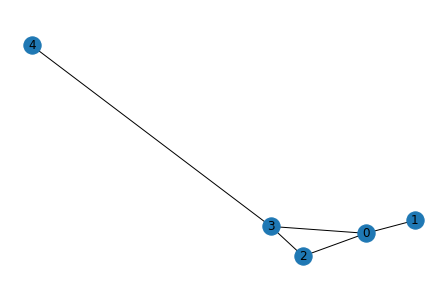

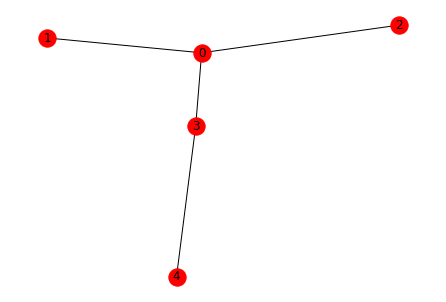

EdgeDataView([(3, 4, {'weight': 0.1}), (3, 0, {'weight': 1.0}), (0, 2, {'weight': 3.0}), (0, 1, {'weight': 7.5})])

In [19]:
def minSpanTree(G_in):
        
    g=nx.Graph()
    # 1-Sort all the edges in non-decreasing order of their weight.
    edges = list(sorted(G_in.edges(data=True),key=lambda x:x[2]['weight']))
    n = len(edges)
    # 2-Pick the smallest edge (i.e., the edge with the lowest weight)
    for i in range(n):
        edge=edges[i]
        tree=list(g.nodes())
        if edge[0] not in tree or edge[1] not in tree:
            g.add_edge(edge[0],edge[1],weight=edge[2]["weight"])

    # 3-Pick the smallest edge that create a path which were not befor
    for i in range(n):
        edge=edges[i]
        tree=list(g.nodes())
        if g.has_edge(edge[0],edge[1])==False and nx.has_path(g,edge[0],edge[1])==False:
            g.add_edge(edge[0],edge[1],weight=edge[2]["weight"])

    
    nx.draw_spring(G_in, with_labels = True)
    plt.show()    
    colors = ['r']
    nx.draw_spring(g, with_labels = True, node_color = colors)
    plt.show()
    
    return g
    
G = minSpanTree(G_out)
G.edges(data=True)
# [(3, 4, {'weight': 0.1}), (3, 0, {'weight': 1}), (0, 2, {'weight': 3}), (0, 1, {'weight': 7.5})]

Use the `minimum_spanning_tree` function of networkx to obtain the minimum cost spanning tree for the graph.

In [22]:
def minSpanTreeNetworkx(G):
    return nx.minimum_spanning_tree(G)
G_netx = minSpanTreeNetworkx(G_out)

## e) Compare the results (0.25+0.25)
Compare your minimal spanning tree with the one from networkx.
Therefor write a function `compare_edges(G, G_netx)` that returns the extra and missing edges for the two graphs.
Additionally write a function `get_total_span(G)` that returns the total span (sum of all weights) for a Graph.
You can use these functions to verify your implementation. Make sure that if there are missing or extra edges that the total span of your implementation is the same as that of networkx.

In [20]:
def get_total_span(G):
    sums = 0
    for i in list(G.edges(data=True)):
        sums += i[2]['weight']
    return sums
    

def compare(G, G_netx):
    extra_edges = []
    missing_edges = []
    
    # convert the tuples in sets
    list_edges_G = []
    edges_G=list(G.edges())
    for edge in edges_G:
        list_edges_G += [{edge[0],edge[1]}]
    
    list_edges_G_netx = []
    edges_G_netx=list(G_netx.edges())
    for edge in edges_G_netx:
        list_edges_G_netx += [{edge[0],edge[1]}]
    
    # compare two lists of edges
    for edge in list_edges_G:
        if edge not in list_edges_G_netx:
            extra_edges.append(edge)
    for edge in list_edges_G_netx:
        if edge not in list_edges_G:
            missing_edges.append(edge)
    
    return extra_edges, missing_edges

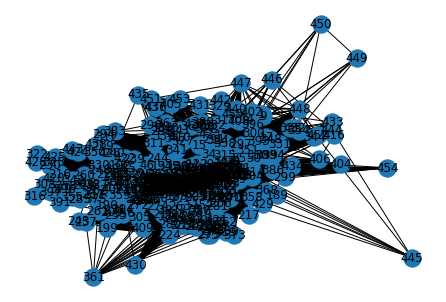

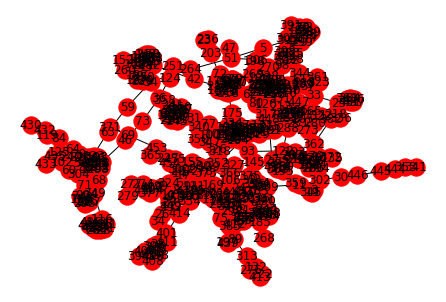

([], [])

In [23]:
G_sym = make_symmetric(G_large)
G = minSpanTree(G_sym)
G_netx = minSpanTreeNetworkx(G_sym)
compare(G, G_netx) # There might be some confused edges

In [24]:
# If there are confused edges the total span should be the same still
print(get_total_span(G)) 
print(get_total_span(G_netx))
# output
# 23864.0

23864.0
23864.0
